<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/regularized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [3]:
library(tidyverse)
library(ggplot2)
library(glmnet)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [4]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [ ]:
train = sample(1:101, 101/2)
dat_train <- data.frame(x[train], y[train])
dat_train <- setNames(dat_train, c("x","y"))

dat_test <- data.frame(x[-train], y[-train])
dat_test <- setNames(dat_test, c("x","y"))

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

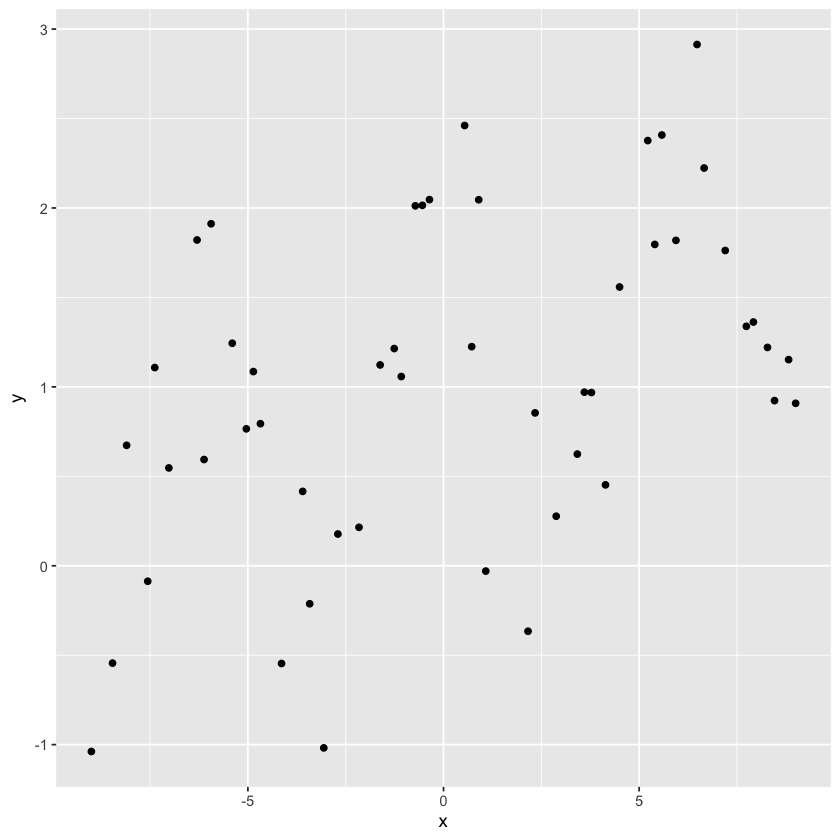

In [20]:
ggplot(data = dat_train, aes(x = x, y = y)) +
    geom_point()

How would you describe the relationship between $x$ and $y$ based on this plot?

> There seems to be weak positive correlation between x and y.
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*


Call:
lm(formula = y ~ poly(x, 2), data = dat_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85071 -0.57322  0.08679  0.61732  1.46917 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0123     0.1179   8.587 3.44e-11 ***
poly(x, 2)1   2.8726     0.8337   3.446  0.00121 ** 
poly(x, 2)2  -0.7055     0.8337  -0.846  0.40169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8337 on 47 degrees of freedom
Multiple R-squared:  0.2113,	Adjusted R-squared:  0.1777 
F-statistic: 6.295 on 2 and 47 DF,  p-value: 0.003783


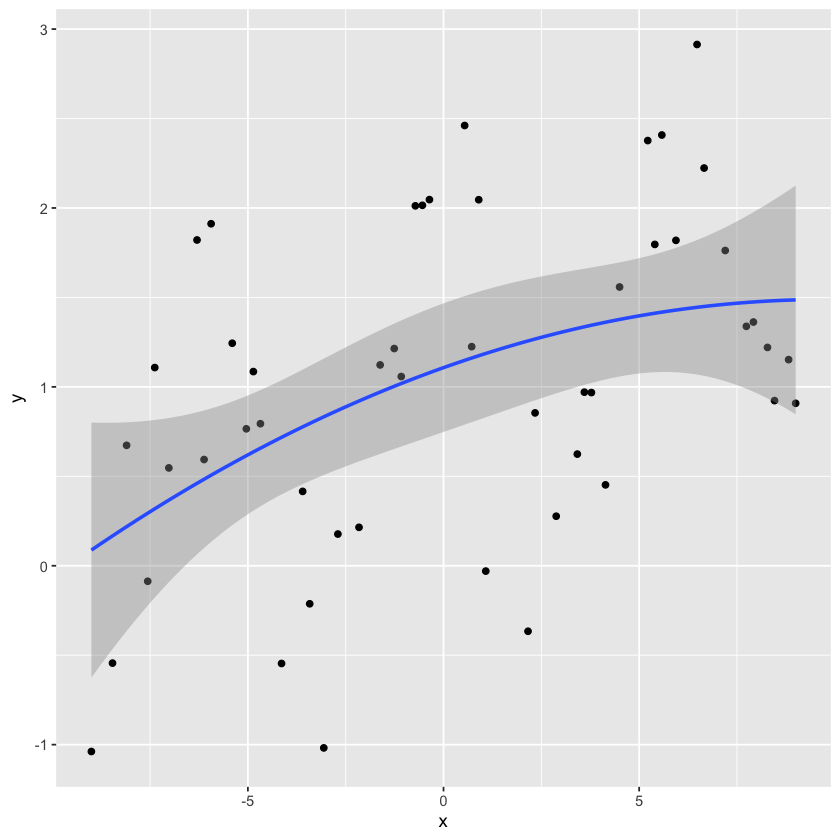

In [34]:
poly_2 <- lm(y ~ poly(x, 2), data = dat_train)
summary(poly_2)
ggplot(data = dat_train, aes(x = x, y = y)) +
    geom_point() +
    stat_smooth(method = "lm", formula = y ~ poly(x,2))

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> This 2nd degree polynomial model seems to capture the weak positive correlation between x and y, but it doesn't fit well. Some other models could do better.
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = y ~ poly(x, 12), data = dat_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26219 -0.29886  0.07747  0.26174  0.77006 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.01234    0.07230  14.001 2.32e-16 ***
poly(x, 12)1   2.87262    0.51125   5.619 2.06e-06 ***
poly(x, 12)2  -0.70551    0.51125  -1.380 0.175881    
poly(x, 12)3  -0.06814    0.51125  -0.133 0.894687    
poly(x, 12)4  -1.86794    0.51125  -3.654 0.000797 ***
poly(x, 12)5   0.05619    0.51125   0.110 0.913082    
poly(x, 12)6  -2.23236    0.51125  -4.366 9.78e-05 ***
poly(x, 12)7   0.73573    0.51125   1.439 0.158536    
poly(x, 12)8   3.18020    0.51125   6.220 3.16e-07 ***
poly(x, 12)9  -0.35125    0.51125  -0.687 0.496340    
poly(x, 12)10 -1.76625    0.51125  -3.455 0.001398 ** 
poly(x, 12)11  0.64555    0.51125   1.263 0.214606    
poly(x, 12)12  0.44547    0.51125   0.871 0.389193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.'

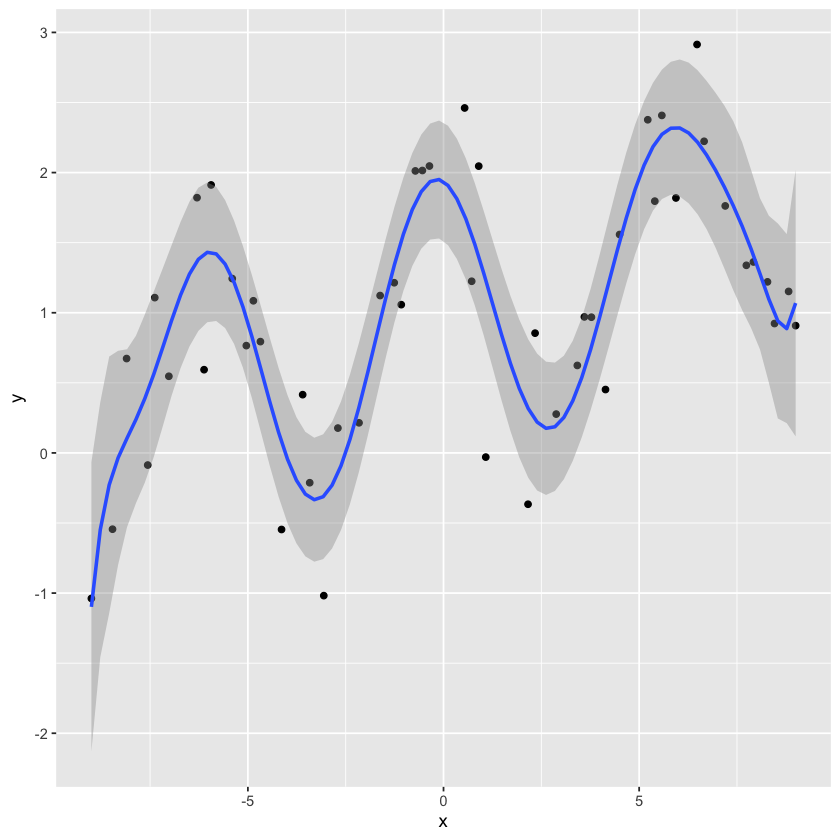

In [35]:
poly_12 <- lm(y ~ poly(x, 12), data = dat_train)
summary(poly_12)
ggplot(data = dat_train, aes(x = x, y = y)) +
    geom_point() +
    stat_smooth(method = "lm", formula = y ~ poly(x,12))

> The 12th degree polynomial model fits the data much better than the 2nd degree polynomial model because it captures the trend of y much more closely.
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

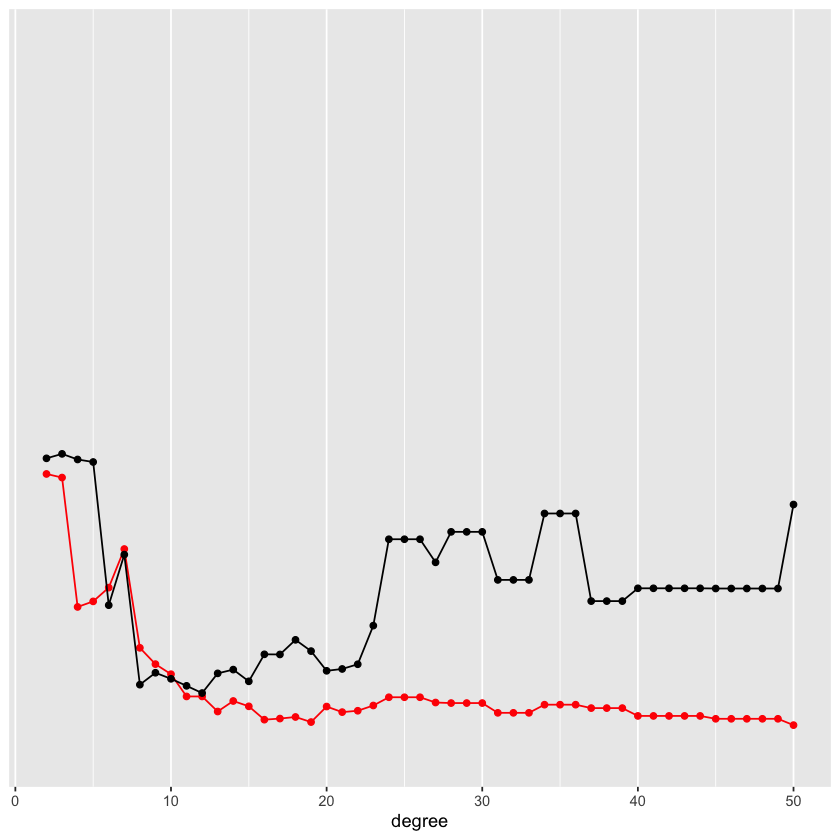

In [58]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)
# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
options(warn = -1)
for (k in degree) {
    mod <- lm(y ~ poly(x, k, raw = TRUE), data = dat_train)
    pred <- predict(mod, newdata = dat_test)
    train_rss[k-1] <- median(resid(mod)^2)
    test_rss[k-1] <- median((pred - dat_test$y)^2)
}

# Plot your results here
dat_plot <- data.frame(degree, train_rss, test_rss)
ggplot(data = dat_plot, aes(x = degree)) +
    geom_point(y = train_rss, color = "red") +
    geom_line(y = train_rss, color = "red") +
    geom_point(y = test_rss) +
    geom_line(y = test_rss)


What do you see as $k$ increase?

> As k increases, the model fits the training set more and more. But as k increases, the fit for the test dataset intially increases but then decreases, which represents the bias-variance trade-off.
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



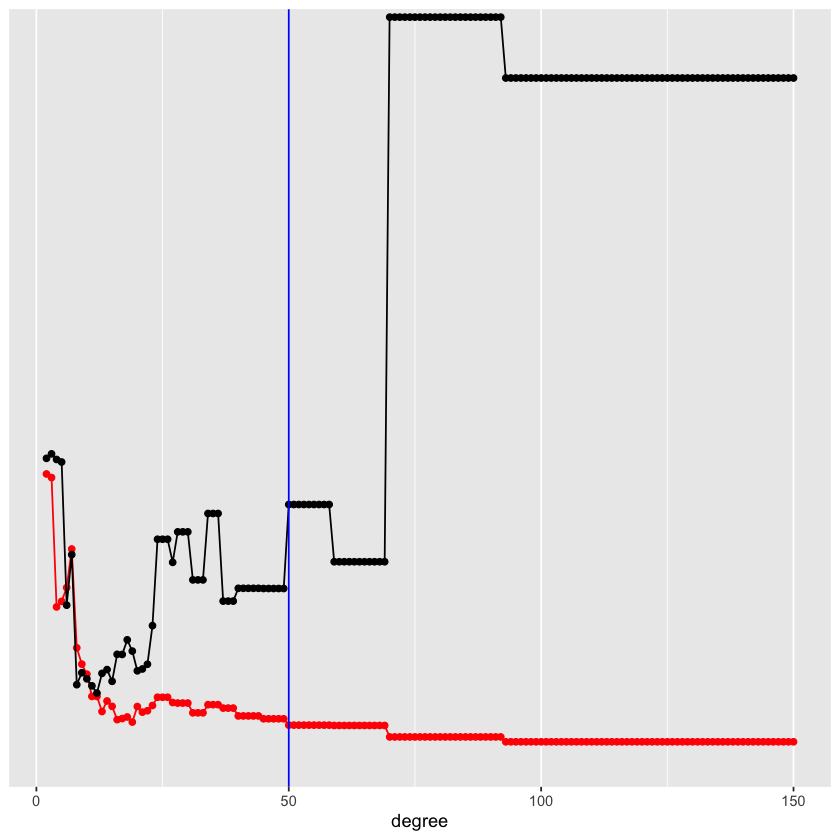

In [65]:
degree = seq(2,150)
# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
options(warn = -1)
for (k in degree) {
    mod <- lm(y ~ poly(x, k, raw = TRUE), data = dat_train)
    pred <- predict(mod, newdata = dat_test)
    train_rss[k-1] <- median(resid(mod)^2)
    test_rss[k-1] <- median((pred - dat_test$y)^2)
}

# Plot your results here
dat_plot <- data.frame(degree, train_rss, test_rss)
ggplot(data = dat_plot, aes(x = degree)) +
    geom_point(y = train_rss, color = "red") +
    geom_line(y = train_rss, color = "red") +
    geom_point(y = test_rss) +
    geom_line(y = test_rss) +
    geom_vline(xintercept = length(dat_train$x), color = "blue")

What do you see as $k$ gets larger than $n$?

> As k gets larger than n, the error of model for training set continues to decrease, but the error for testing set increases drastically.
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

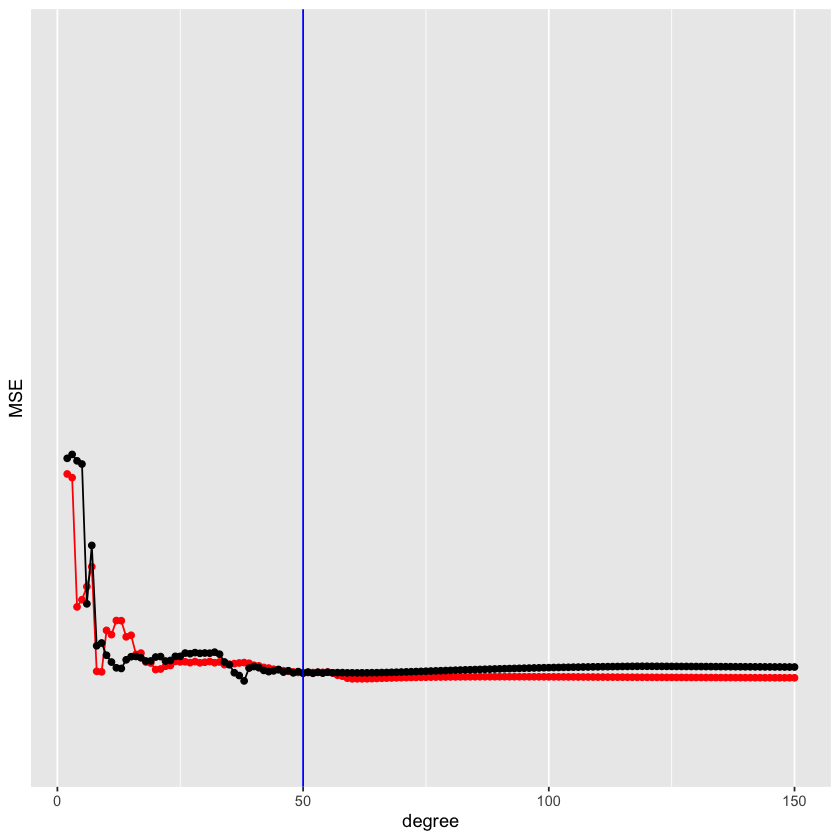

In [ ]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
    ridge.mod <- glmnet(poly(dat_train$x, k, raw = TRUE), dat_train$y, data = dat_train, alpha=0, lambda = lambda)
    pred_train <- predict(ridge.mod, poly(dat_train$x, k, raw = TRUE), s = lambda)
    pred_test <- predict(ridge.mod, poly(dat_test$x, k, raw = TRUE), s = lambda)
    train_rss[k-1] <- median((pred_train - dat_train$y)^2)
    test_rss[k-1] <- median((pred_test - dat_test$y)^2)
}

# Plot your results here
dat_plot <- data.frame(degree, train_rss, test_rss)
ggplot(data = dat_plot, aes(x = degree)) +
    geom_point(y = train_rss, color = "red") +
    geom_line(y = train_rss, color = "red") +
    geom_point(y = test_rss) +
    geom_line(y = test_rss) +
    geom_vline(xintercept = length(dat_train$x), color = "blue") +
    labs(y = "MSE")

What happens now when $k$ gets larger than $n$?

> With ridge regression, error for both training and testing set doesn't increase when k gets larger than n.

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> Without regularization, errors for testing set when k increases becomes large because the models trained on the training set were too complex with many variables, leading to overfitting of the training dataset (small bias) and high prediction variance when trying to generalize to the training dataset. Regularization handles variables with weak effect (small coefficients). When k gets larger, ridge regression forces those small coefficients to reach to near 0, which helps reduce variance for high degree polynomial models and ensure the generalizability of those models to testing set.

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> Regularization such as ridge regression applies a sparsity constraint that penalizes variables with weak effects. When p becomes larger than n, there are many variables with small coefficients. Regularization forces these coefficients to be near 0. When p > n, the model is essentially overfitting, regularization helps reduces those weak coefficients to reduce variance and work around this upper limit.

**DUE:** 5pm EST, April 10, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*